# Лабораторная работа №3. Шут Артём

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as la
from random import random
from random import randint
from random import uniform
from matplotlib import pyplot as plt

# Задание 1

## 1.1

Matrix:
[[ 3.  0.  6.]
 [ 0. -6.  0.]
 [ 6.  0.  3.]]
CIrcles:
(x - 3.0)^2 + (y - 0.0)^2 = (6.0)^2
(x - -6.0)^2 + (y - 0.0)^2 = (0.0)^2
(x - 3.0)^2 + (y - 0.0)^2 = (6.0)^2


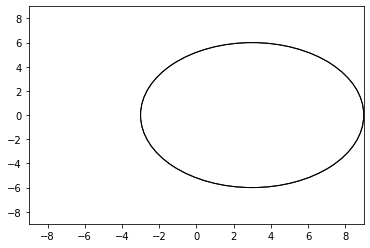

Matrix:
[[ 3.  3.  0. -5. -3. -4.]
 [ 3.  5.  6. -5. -5. -3.]
 [ 0.  6.  1. -6. -5. -5.]
 [-5. -5. -6.  1.  6.  0.]
 [-3. -5. -5.  6.  5.  3.]
 [-4. -3. -5.  0.  3.  3.]]
CIrcles:
(x - 3.0)^2 + (y - 0.0)^2 = (15.0)^2
(x - 5.0)^2 + (y - 0.0)^2 = (22.0)^2
(x - 1.0)^2 + (y - 0.0)^2 = (22.0)^2
(x - 1.0)^2 + (y - 0.0)^2 = (22.0)^2
(x - 5.0)^2 + (y - 0.0)^2 = (22.0)^2
(x - 3.0)^2 + (y - 0.0)^2 = (15.0)^2


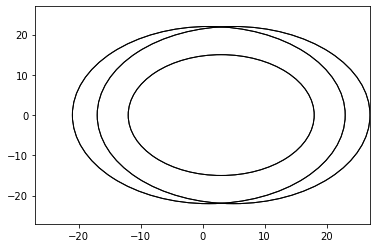

Matrix:
[[ 4. -6. -5.  0.  1.  2.  2.]
 [-6. -1. -2.  1. -5. -3.  2.]
 [-5. -2.  4.  2.  0. -5.  1.]
 [ 0.  1.  2.  3.  2.  1.  0.]
 [ 1. -5.  0.  2.  4. -2. -5.]
 [ 2. -3. -5.  1. -2. -1. -6.]
 [ 2.  2.  1.  0. -5. -6.  4.]]
CIrcles:
(x - 4.0)^2 + (y - 0.0)^2 = (16.0)^2
(x - -1.0)^2 + (y - 0.0)^2 = (19.0)^2
(x - 4.0)^2 + (y - 0.0)^2 = (15.0)^2
(x - 3.0)^2 + (y - 0.0)^2 = (6.0)^2
(x - 4.0)^2 + (y - 0.0)^2 = (15.0)^2
(x - -1.0)^2 + (y - 0.0)^2 = (19.0)^2
(x - 4.0)^2 + (y - 0.0)^2 = (16.0)^2


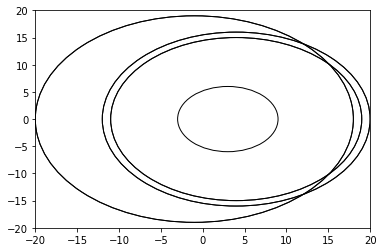

In [2]:
for N in [3, 6, 7]:
    A = np.zeros((N,N))
    for i in range(N // 2 + 1):
        for j in range(i, N - i):
            A[i][j] = A[N - j - 1][N - i - 1] = A[j][i] = A[N - i - 1][N - j - 1] = randint(-6, 6)

    print("Matrix:")
    print(A)
    ax = plt.gca()
    l = max([sum(abs(A[i][j]) for j in range(len(A))) for i in range(len(A))])
    ax.set(xlim=(-l, l), ylim = (-l, l))
    print("CIrcles:")
    for i in range(len(A)):
        print("(x - " +  str(A[i][i].real) + ")^2 + (y - " +  str(A[i][i].imag) + ")^2 = (" + 
              str(sum(abs(A[i][j]) for j in range(len(A))) - abs(A[i][i])) + ")^2")
        ax.add_patch(plt.Circle((A[i][i].real, A[i][i].imag), sum(abs(A[i][j]) for j in range(len(A))) - abs(A[i][i]),
                               fill = False))
    plt.show()
        

## 1.2

In [3]:
def powermethod(A, n = 1000, eps = 1e-5):
    x = np.array([random() for _ in range(len(A))])
    Ax = A.dot(x)
    eVal = x.dot(Ax)/x.dot(x) 
    for i in range(n):
        x_prev = x
        eVal_prev = eVal
        x = Ax / la.norm(x)
        Ax = A.dot(x)
        eVal = x.dot(Ax)/x.dot(x)
        if abs((eVal - eVal_prev)/eVal) < eps:
            break
    return (eVal, i + 1, abs((eVal - eVal_prev)/eVal))


def powermaxmin(A):
    Max = powermethod(A)
    try:
        Min = powermethod(la.inv(A))
        Min = (1/Min[0], Min[1], Min[2])
    except la.LinAlgError:
        Min = None
    finally:
        return (Max, Min, la.eigvals(A))

In [4]:
def print_result(K):
    size = 2**K
    n = 5
    A = np.zeros((n,n))
    for i in range(n // 2 + 1):
        for j in range(i, n - i):
            A[i][j] = A[n - j - 1][n - i - 1] = A[j][i] = A[n - i - 1][n - j - 1] = randint(-size, size)
    print("\nMatrix:")
    print(A)
    (Max,Min,Eigvs) = powermaxmin(A)
    (L, N, Exp) = Max
    print("Max\nEigenvalue:", L, "\nThe num of operations:", N, "\nThe discrepancy:", Exp)
    if Min == None:
        print("The matrix cannot be inverted")
    else:
        (L, N, Exp) = Min
        print("Min\nEigenvalue:", L, "\nThe num of operations:", N, "\nThe discrepancy:", Exp)
    print("Eigvs")
    for i in range(1, len(Eigvs) + 1):
        print(str(i) + ". ", Eigvs[i - 1], "( abs =", abs(Eigvs[i - 1]) ,")")

In [5]:
print_result(1)


Matrix:
[[ 2.  2.  0.  2.  1.]
 [ 2.  0.  0. -1.  2.]
 [ 0.  0. -1.  0.  0.]
 [ 2. -1.  0.  0.  2.]
 [ 1.  2.  0.  2.  2.]]
Max
Eigenvalue: 5.472103179257365 
The num of operations: 12 
The discrepancy: 8.887422972408305e-06
Min
Eigenvalue: -1.4345493101673121 
The num of operations: 5 
The discrepancy: 5.043909792033325e-06
Eigvs
1.  (5.472135954999578+0j) ( abs = 5.472135954999578 )
2.  (-3.4721359549995796+0j) ( abs = 3.4721359549995796 )
3.  (0.9999999999999997+3.1401849173675503e-16j) ( abs = 0.9999999999999997 )
4.  (0.9999999999999997-3.1401849173675503e-16j) ( abs = 0.9999999999999997 )
5.  (-1+0j) ( abs = 1.0 )


In [6]:
print_result(2)


Matrix:
[[ 0.  3. -4. -3. -1.]
 [ 3.  0.  2.  0. -3.]
 [-4.  2.  3.  2. -4.]
 [-3.  0.  2.  0.  3.]
 [-1. -3. -4.  3.  0.]]
Max
Eigenvalue: 7.71085155447395 
The num of operations: 37 
The discrepancy: 7.511657066223417e-06
Min
Eigenvalue: -0.1878417905873858 
The num of operations: 3 
The discrepancy: 8.539874233067666e-07
Eigvs
1.  7.710996896421683 ( abs = 7.710996896421683 )
2.  6.520797289396152 ( abs = 6.520797289396152 )
3.  -0.18784179040175988 ( abs = 0.18784179040175988 )
4.  -5.523155106019921 ( abs = 5.523155106019921 )
5.  -5.520797289396148 ( abs = 5.520797289396148 )


In [7]:
print_result(3)


Matrix:
[[-6.  4. -6. -4. -4.]
 [ 4.  0. -7. -2. -4.]
 [-6. -7. -8. -7. -6.]
 [-4. -2. -7.  0.  4.]
 [-4. -4. -6.  4. -6.]]
Max
Eigenvalue: -20.32307719524859 
The num of operations: 8 
The discrepancy: 4.370508598396636e-06
Min
Eigenvalue: -6.728229240316373 
The num of operations: 126 
The discrepancy: 9.761779772705555e-06
Eigvs
1.  -20.32309442720853 ( abs = 20.32309442720853 )
2.  -8.24621125123532 ( abs = 8.24621125123532 )
3.  -6.727561505900754 ( abs = 6.727561505900754 )
4.  8.246211251235321 ( abs = 8.246211251235321 )
5.  7.0506559331092715 ( abs = 7.0506559331092715 )


In [8]:
print_result(4)


Matrix:
[[  1.   6.  -3.   4.   7.]
 [  6. -14.   2.   2.   4.]
 [ -3.   2.  -9.   2.  -3.]
 [  4.   2.   2. -14.   6.]
 [  7.   4.  -3.   6.   1.]]
Max
Eigenvalue: -18.159518716308945 
The num of operations: 46 
The discrepancy: 8.567126537654477e-06
Min
Eigenvalue: -5.614892645467368 
The num of operations: 31 
The discrepancy: 7.382503627487816e-06
Eigvs
1.  12.527293067276425 ( abs = 12.527293067276425 )
2.  -18.1602001901517 ( abs = 18.1602001901517 )
3.  -16.38516480713452 ( abs = 16.38516480713452 )
4.  -5.614835192865502 ( abs = 5.614835192865502 )
5.  -7.367092877124731 ( abs = 7.367092877124731 )


## 1.3

$$
A = 
\begin{equation}
    \begin{pmatrix}  
    2 & -1 & 0 & 0 \\
    -1 & 2 & -1 & 0 \\
    0 & -1 & 2 & -1 \\
    0 & 0 & -1 & 2
    \end{pmatrix} 
\end{equation}
$$

Из теоремы Гершгорина: $$ 4 >= \lambda_1 >= \lambda_2 >= \lambda_3 >= \lambda >= 0, $$
где $ \lambda_1, \lambda_2, \lambda_3, \lambda $ - решения уравнения:
$$ 
\begin{equation}
    \begin{vmatrix}  
    (2 - \lambda) & -1 & 0 & 0 \\
    -1 & (2 - \lambda) & -1 & 0 \\
    0 & -1 & (2 - \lambda) & -1 \\
    0 & 0 & -1 & (2 - \lambda)
    \end{vmatrix} 
\end{equation}
= 0
$$

Введём матрицу А' ( ' - просто отличительная черата, не обратная матрица, и не что-либо ещё):
$$
A' = A - 4I = 
\begin{equation}
    \begin{pmatrix}  
    -2 & -1 & 0 & 0 \\
    -1 & -2 & -1 & 0 \\
    0 & -1 & -2 & -1 \\
    0 & 0 & -1 & -2
    \end{pmatrix} 
\end{equation}
$$

Пусть $ \lambda_1', \lambda_2', \lambda_3', \lambda_4'$ - решения уравнения:
$$ 
\begin{equation}
    \begin{vmatrix}  
    (-2 - \lambda') & -1 & 0 & 0 \\
    -1 & (-2 - \lambda') & -1 & 0 \\
    0 & -1 & (-2 - \lambda') & -1 \\
    0 & 0 & -1 & (-2 - \lambda')
    \end{vmatrix} 
\end{equation}
= 0
$$

$$ 
\begin{equation}
    \begin{vmatrix}  
    2 - (\lambda' + 4) & -1 & 0 & 0 \\
    -1 & 2 - (\lambda' + 4) & -1 & 0 \\
    0 & -1 & 2 - (\lambda' + 4) & -1 \\
    0 & 0 & -1 & 2 - (\lambda' + 4)
    \end{vmatrix} 
\end{equation}
= 0
$$

Откуда мы видим, что собственные значения матриц A и A' относятся как $ \lambda = \lambda' + 4 $
$$ 4 >= \lambda_1 >= \lambda_2 >= \lambda_3 >= \lambda >= 0$$
$$ 0 >= \lambda_1' >= \lambda_2' >= \lambda_3' >= \lambda - 4 >= -4$$
$$ 0 <= |\lambda_1'| <= |\lambda_2'| <= |\lambda_3'| <= |\lambda - 4| <= 4$$

Т.е., мы доказали, что если $\lambda$ - наименьшее по модулю собственное значение матрицы $ A $, то спектральный радиус матрицы $ A - 4I $ равен $|\lambda - 4|$.

# Задание 2

## 2.1

In [9]:
def qrfactor(A):
    I = np.eye(len(A))
    Q = I
    R = A
    for i in range(len(A)):
        c = A[:, i]
        e = np.zeros(len(A))
        e[i] = -1 if c[i] < 0 else 1
        v = c + la.norm(c)*e
        H = I - 2 * np.outer(v, v) / np.inner(v, v)
        Q = Q.dot(H)
        R = H.dot(R)
    return Q, R

def qr_method(A, n, eps):
    I = np.eye(len(A))
    for i in range(n):
        Q = I
        R = A
        A_prev = A
        for j in range(len(A)):
            c = np.zeros(len(A))
            for k in range(j, len(A)):
                c[k] = A[k][j] 
            c[j] += -la.norm(c) if c[j] < 0 else la.norm(c)
            H = I - 2 * np.outer(c, c) / c.dot(c)
            Q = Q.dot(H)
            R = H.dot(R)
        A = R.dot(Q)
        if np.sqrt(sum([(A[k][k] - A_prev[k][k])**2 for k in range(len(A))])) < eps:
            break
    return [A[i][i] for i in range(len(A))], i + 1

def lambdas(m, a):
    return [1 + 4*a*(np.sin(np.pi*i/2/m))**2 for i in range(1, m)]

for m in [3, 3, 8, 30]:
    a = random()
    A = np.zeros((m-1,m-1))
    A[0][0] = 1 + 2*a
    for i in range(1,m-1):
        A[i][i] = A[0][0]
        A[i][i-1] = A[i-1][i] = -a
    lam = lambdas(m, a)
    lam_my, n = qr_method(A, 5000, 1e-14)
    lam.sort()
    lam_np = la.eigvals(A)
    lam_np.sort()
    lam_my.sort()
    print("M =", m, "a =", a)
    print("\tExpected eigValues:\n", lam)
    print("\tMy eigValues:\n", lam_my)
    print("\tNumPy eigValues:\n", lam_np)
    print("\tThe discrepancy:\n", [(lam[i] - lam_my[i]) for i in range(len(lam))])
    print("\tThe number of operations:", n, "\n")
    

M = 3 a = 0.9603358971710253
	Expected eigValues:
 [1.9603358971710252, 3.8810076915130756]
	My eigValues:
 [1.9603358971710263, 3.881007691513079]
	NumPy eigValues:
 [1.9603359  3.88100769]
	The discrepancy:
 [-1.1102230246251565e-15, -3.552713678800501e-15]
	The number of operations: 26 

M = 3 a = 0.9032713343081641
	Expected eigValues:
 [1.903271334308164, 3.709814002924492]
	My eigValues:
 [1.9032713343081658, 3.7098140029244915]
	NumPy eigValues:
 [1.90327133 3.709814  ]
	The discrepancy:
 [-1.7763568394002505e-15, 4.440892098500626e-16]
	The number of operations: 26 

M = 8 a = 0.8506170508690447
	Expected eigValues:
 [1.1294987351320445, 1.4982799320132816, 2.050199996428417, 2.701234101738089, 3.352268207047762, 3.904188271462897, 4.272969468344135]
	My eigValues:
 [1.129498735132045, 1.4982799320132847, 2.0501999964284074, 2.701234101738094, 3.3522682070477603, 3.9041882714629437, 4.272969468344084]
	NumPy eigValues:
 [1.12949874 1.49827993 2.0502     2.7012341  3.35226821 3.

## 2.2

$$
A = 
\begin{equation}
    \begin{pmatrix}  
    1+2\alpha & -\alpha & 0 & ... & 0 \\
    -\alpha & 1+2\alpha & -\alpha & ... & ... \\
    0 & -\alpha & 1+2\alpha & ... & 0 \\
    ... & ... & ... & ... & -\alpha \\
    0 & ... & 0 & -\alpha & 1+2\alpha
    \end{pmatrix} 
\end{equation}
$$
Из теоремы Гершгорина: 
$$ 2\alpha > \lambda_1-(1+2\alpha) >= \lambda_2-(1+2\alpha) >= ... >= \lambda_{m-1}-(1+2\alpha) > -2\alpha $$
$$ 4\alpha+1 > \lambda_1 >= \lambda_2 >= ... >= \lambda_{m-1} > 1 $$
$$ \frac{1}{4\alpha+1} < \frac{1}{\lambda_1} <= \frac{1}{\lambda_2} <= ... <= \frac{1}{\lambda_{m-1}} < 1 $$
Если $A'$ - обратная матрица для матрицы $A$, то её собственные значения есть обратные собственые значения матрицы $A$, значит, справедливо следующее:
$$ \frac{1}{4\alpha+1} < \lambda_1' <= \lambda_2' <= ... <= \lambda_{m-1}' < 1 $$

# Задание 3

У нас есть задача по нахождению определителя матрицы. Решаем через произведение собственных значений

In [10]:
def det(matrix):
    eigs, _ = qr_method(matrix, 2000, 1e-14)
    return np.prod(eigs)


print("используя собственные значения: " + str(np.linalg.det(A)))
print("используя numpy: " + str(det(A)))

используя собственные значения: 40734101355.26434
используя numpy: 40734101355.26776


# Задание 4

In [11]:
data = pd.read_excel("forPCAanalysis.xls")
data[:5]

,LP,национальность,пол,возраст,тестА1,ТестА2,ТестВ1,U1,U2,ТестAсс,ТестНе
0,Y1,Y2,Y3,Y4,X1,X2,X3,X4,X5,X6,X7
1,1,французы,женщина,6,77.14,65.71,82.86,82.86,85.71,20,77.14
2,2,французы,женщина,6,68.57,62.86,80,91.43,88.57,17.14,74.29
3,3,французы,мужчина,6,74.29,62.86,80,85.71,82.86,22.86,68.57
4,4,французы,женщина,6,71.43,65.71,82.86,88.57,91.43,14.29,77.14


..................
.............
.


In [12]:
data = data.drop([0])
nation = np.array(data["национальность"])
sex = np.array(data["пол"])
age = np.array(data["возраст"])
data = data.drop(["LP"],axis = 1)
data = data.drop(["национальность"],axis = 1)
data = data.drop(["пол"],axis = 1)
data = data.drop(["возраст"],axis = 1)
data.describe()

,тестА1,ТестА2,ТестВ1,U1,U2,ТестAсс,ТестНе
count,642.00,642.00,642.00,642.00,642.00,642.0,642.00
unique,25.00,32.00,41.00,46.00,41.00,44.0,23.00
top,71.43,62.86,82.86,85.71,91.43,20.0,74.29
freq,132.00,138.00,138.00,95.00,107.00,109.0,166.00


In [13]:
titles = list(data.columns)
data[:5]

,тестА1,ТестА2,ТестВ1,U1,U2,ТестAсс,ТестНе
1,77.14,65.71,82.86,82.86,85.71,20,77.14
2,68.57,62.86,80,91.43,88.57,17.14,74.29
3,74.29,62.86,80,85.71,82.86,22.86,68.57
4,71.43,65.71,82.86,88.57,91.43,14.29,77.14
5,74.29,68.57,85.71,85.71,88.57,17.14,74.29


In [14]:
data = np.array(data)
data = np.transpose(data)
Z = np.array([(i - i.mean())/i.std() for i in data],dtype = float)
Z

array([[ 0.94846921, -0.94762144,  0.31791398, ...,  0.94910135,
        -0.3151698 ,  0.31696577],
       [ 0.48671058, -0.03446465, -0.03446465, ..., -0.03498713,
        -0.03498713,  0.4874943 ],
       [ 0.41579881,  0.15703094,  0.15703094, ...,  0.932559  ,
        -0.10147841,  0.4155403 ],
       ...,
       [ 0.23023941,  0.47001375, -0.00869657, ...,  0.47013352,
         0.23059871,  0.23059871],
       [-0.23061671, -0.47039698,  0.00916355, ..., -0.47015744,
        -0.23061671, -0.23061671],
       [ 0.50123595, -0.2278752 , -1.69121408, ...,  0.50196689,
         0.50196689, -0.22897161]])

In [15]:
R = np.corrcoef(Z)
R

array([[ 1.        , -0.25326659, -0.08636662, -0.2668783 , -0.17541069,
         0.17536704, -0.46946821],
       [-0.25326659,  1.        ,  0.14407927, -0.06653931,  0.02032699,
        -0.0203169 ,  0.45890993],
       [-0.08636662,  0.14407927,  1.        ,  0.89221857,  0.95627181,
        -0.95628314,  0.20196181],
       [-0.2668783 , -0.06653931,  0.89221857,  1.        ,  0.96734081,
        -0.96734651,  0.08740064],
       [-0.17541069,  0.02032699,  0.95627181,  0.96734081,  1.        ,
        -0.99999994,  0.1918868 ],
       [ 0.17536704, -0.0203169 , -0.95628314, -0.96734651, -0.99999994,
         1.        , -0.19186642],
       [-0.46946821,  0.45890993,  0.20196181,  0.08740064,  0.1918868 ,
        -0.19186642,  1.        ]])

In [16]:
# eigval,eigvec = rotation_method(R)
# print(eigval/sum(eigval))
eigval,eigvec = np.linalg.eig(R)
print(['%f'%e for e in eigval])

['3.973880', '1.711050', '0.787589', '0.466564', '0.047507', '0.013409', '0.000000']


In [17]:
total = sum(eigval)
variance = [(i/total)*100 for i in eigval] 
print("Variance captured by each component is: \n\n", variance)
cum_variance = np.cumsum(variance)
print("\n\nCumulative variance captured as we travel each component: \n\n", cum_variance)

Variance captured by each component is: 

 [56.76971835423345, 24.44357136034091, 11.251270549915528, 6.665205330631652, 0.6786777194150267, 0.1915558405106283, 8.449528008779475e-07]


Cumulative variance captured as we travel each component: 

 [ 56.76971835  81.21328971  92.46456026  99.1297656   99.80844331
  99.99999916 100.        ]


В 2х компонентах ходержится 86% всей информации

In [18]:
eigvec = eigvec[:2]
eigvec = np.array(eigvec)
eigvec
# for z in Z:
#     print(sum(z))
# P = np.dot(eigvec,Z)
# for p in P:
#     print(sum(p))

array([[-1.42725716e-01,  5.05651177e-01,  7.19037047e-01,
         3.93477135e-01,  2.05075970e-01, -1.00257505e-01,
        -7.41746063e-05],
       [ 5.32660009e-02, -5.70610427e-01,  6.34697431e-01,
        -4.92328873e-01,  1.62277089e-01, -2.01798562e-03,
         5.61008272e-08]])

In [19]:
P = np.dot(eigvec,Z)

print('min_val_1 = %d, max_val_1 = %d'%(min(P[0]), max(P[0]))) 
print('min_val_2 = %d, max_val_2 = %d'%(min(P[1]), max(P[1]))) 
print('')

nation_dict = {}
nation_result_1 = {}
nation_result_2 = {}
for i in range(642):
    if nation[i] in nation_dict:
        nation_dict[nation[i]] += 1
        nation_result_1[nation[i]] += P[0][i]
        nation_result_2[nation[i]] += P[1][i]
    else:
        nation_dict[nation[i]] = 1
        nation_result_1[nation[i]] = P[0][i]
        nation_result_2[nation[i]] = P[1][i]      
for key in nation_dict.keys():
    print('%s(%d)' % (key, nation_dict[key]), nation_result_1[key]/nation_dict[key], nation_result_2[key]/nation_dict[key])
        
print('')
    
sex_dict = {}
sex_result_1 = {}
sex_result_2 = {}
for i in range(642):
    if sex[i] in sex_dict:
        sex_dict[sex[i]] += 1
        sex_result_1[sex[i]] += P[0][i]
        sex_result_2[sex[i]] += P[1][i]
    else:
        sex_dict[sex[i]] = 1
        sex_result_1[sex[i]] = P[0][i]
        sex_result_2[sex[i]] = P[1][i]
for key in sex_dict.keys():
    print('%s(%d)' % (key, sex_dict[key]), sex_result_1[key]/sex_dict[key], sex_result_2[key]/sex_dict[key])
    
print('')
        
age_dict = {}
age_result_1 = {}
age_result_2 = {}
age_dict['6-9'] = 0
age_result_1['6-9'] = 0
age_result_2['6-9'] = 0
age_dict['10-17'] = 0
age_result_1['10-17'] = 0
age_result_2['10-17'] = 0
age_dict['18-30'] = 0
age_result_1['18-30'] = 0
age_result_2['18-30'] = 0
for i in range(642):
    if age[i] >= 6 and age[i] <= 9:
        age_dict['6-9'] += 1
        age_result_1['6-9'] += P[0][i]
        age_result_2['6-9'] += P[1][i]
    elif age[i] >= 10 and age[i] <= 17:
        age_dict['10-17'] += 1
        age_result_1['10-17'] += P[0][i]
        age_result_2['10-17'] += P[1][i]
    else:
        age_dict['18-30'] += 1
        age_result_1['18-30'] += P[0][i]
        age_result_2['18-30'] += P[1][i]
    
for key in age_dict.keys():    
    print('%s(%d)' % (key, age_dict[key]), age_result_1[key]/age_dict[key], age_result_2[key]/age_dict[key])
    
    

min_val_1 = -8, max_val_1 = 2
min_val_2 = -2, max_val_2 = 1

французы(234) 0.3256232912858858 -0.03918292813619
китайцы(408) -0.18675453470807638 0.022472561725172778

женщина(341) 0.11637952637019255 0.0665698413489899
мужчина(301) -0.131845244160243 -0.07541633189369956

6-9(233) -0.1267349160262825 -0.030747003495268013
10-17(195) 0.20280549870191614 -0.03650781099051349
18-30(214) -0.04681232155489442 0.06674334092312895
